In [7]:
import numpy as np
import scipy as sp

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.datasets import load_iris, load_sample_image
from sklearn.cluster import AgglomerativeClustering, KMeans, kmeans_plusplus
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from numpy.linalg import svd

In [4]:
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

In [35]:
image1 = rgb2gray(img_as_float(data.coffee()))

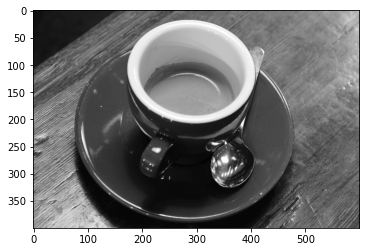

In [36]:
plt.imshow(image1, cmap='gray')

##### Using SVD

Collect the top few singular values to represent image. That is, using lesser information to present the (almost) same image >Compression

In [37]:
def svd_k(img, k):
    U,D,Vt = svd(img, full_matrices=False)
    mat = np.dot(U[:,:k],np.dot(np.diag(D[:k]),Vt[:k,:])) # collecting only top k SVs
    return mat, D, Vt

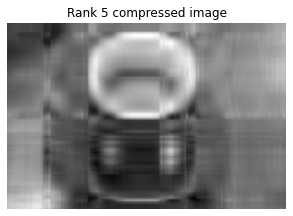

In [38]:
#
k  = 5
compressed_img , D, Vt = svd_k(image1, k)

fig,axes = plt.subplots(figsize=(5,5))
axes.set_title("Rank {:.0f}".format(k)+" compressed image")
axes.imshow(compressed_img,cmap='gray')
axes.axis('off')
plt.show()

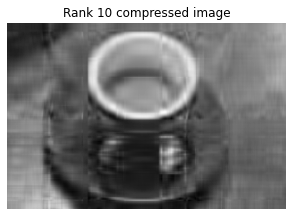

In [39]:
#
k  = 10
compressed_img , D, Vt = svd_k(image1, k)

fig,axes = plt.subplots(figsize=(5,5))
axes.set_title("Rank {:.0f}".format(k)+" compressed image")
axes.imshow(compressed_img,cmap='gray')
axes.axis('off')
plt.show()

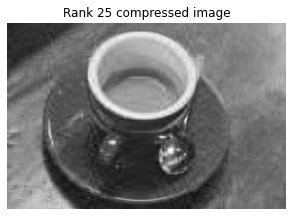

In [40]:
#
k  = 25
compressed_img , D, Vt = svd_k(image1, k)

fig,axes = plt.subplots(figsize=(5,5))
axes.set_title("Rank {:.0f}".format(k)+" compressed image")
axes.imshow(compressed_img,cmap='gray')
axes.axis('off')
plt.show()

#### Through KMeans

In [41]:
def kmeans_fit(X,n_clusters):
    k_means = KMeans(n_clusters=n_clusters, n_init=4)
    k_means.fit(X)
    values = k_means.cluster_centers_.squeeze()
    labels = k_means.labels_
    return k_means, values, labels

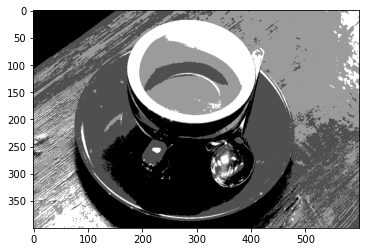

In [42]:
# With 4 clusters
n_clusters = 4

_, vals, labels = kmeans_fit(image1.reshape((-1, 1)) ,n_clusters)

img_compressed = np.choose(labels, vals)
img_compressed.shape = image1.shape # bringing back to proper image shape

plt.imshow(img_compressed, cmap=plt.cm.gray)

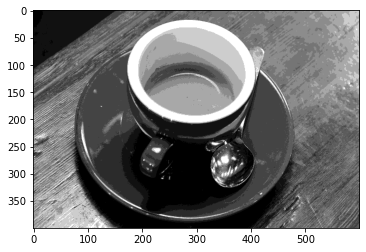

In [43]:
# With 10 clusters
n_clusters = 10

_, vals, labels = kmeans_fit(image1.reshape((-1, 1)) ,n_clusters)

img_compressed = np.choose(labels, vals)
img_compressed.shape = image1.shape # bringing back to proper image shape

plt.imshow(img_compressed, cmap=plt.cm.gray)